_______________________

# Dataset info

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physica Verlag 2004, pp. 1767-1774.

   (c) J. Dvorak, P. Savicky.
       Softening Splits in Decision Trees Using Simulated Annealing.
       Proceedings of ICANNGA 2007, Warsaw, (Ed.: Beliczynski et. al),
       Part I, LNCS 4431, pp. 721-729.

4. Relevant Information:

   The data are MC generated (see below) to simulate registration of high energy
   gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the
   imaging technique. Cherenkov gamma telescope observes high energy gamma rays,
   taking advantage of the radiation emitted by charged particles produced
   inside the electromagnetic showers initiated by the gammas, and developing in the
   atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks
   through the atmosphere and gets recorded in the detector, allowing reconstruction
   of the shower parameters. The available information consists of pulses left by
   the incoming Cherenkov photons on the photomultiplier tubes, arranged in a
   plane, the camera. Depending on the energy of the primary gamma, a total of
   few hundreds to some 10000 Cherenkov photons get collected, in patterns
   (called the shower image), allowing to discriminate statistically those
   caused by primary gammas (signal) from the images of hadronic showers
   initiated by cosmic rays in the upper atmosphere (background).

   Typically, the image of a shower after some pre-processing is an elongated
   cluster. Its long axis is oriented towards the camera center if the shower axis
   is parallel to the telescope's optical axis, i.e. if the telescope axis is
   directed towards a point source. A principal component analysis is performed
   in the camera plane, which results in a correlation axis and defines an ellipse.
   If the depositions were distributed as a bivariate Gaussian, this would be
   an equidensity ellipse. The characteristic parameters of this ellipse
   (often called Hillas parameters) are among the image parameters that can be
   used for discrimination. The energy depositions are typically asymmetric
   along the major axis, and this asymmetry can also be used in discrimination.
   There are, in addition, further discriminating characteristics, like the
   extent of the cluster in the image plane, or the total sum of depositions.

   The data set was generated by a Monte Carlo program, Corsika, described in 
      D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
      Forschungszentrum Karlsruhe FZKA 6019 (1998).
   The program was run with parameters allowing to observe events with energies down
   to below 50 GeV.

5. Number of Instances: 19020

6. Number of Attributes: 11 (including the class)

7. Attribute information:

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
   10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
   11.  class:    g,h         # gamma (signal), hadron (background)

8. Missing Attribute Values: None

9. Class Distribution:

   g = gamma (signal):     12332
   h = hadron (background): 6688

   For technical reasons, the number of h events is underestimated.
   In the real data, the h class represents the majority of the events.

   The simple classification accuracy is not meaningful for this data, since
   classifying a background event as signal is worse than classifying a signal
   event as background. For comparison of different classifiers an ROC curve
   has to be used. The relevant points on this curve are those, where the
   probability of accepting a background event as signal is below one of the
   following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required
   quality of the sample of the accepted events for different experiments.

_______________________________

# WORKBOOK

_______________________________

# IMPORTS

In [4]:
?pd.read_csv

In [187]:
# Import
# Data wrangling 
import pandas as pd 
import numpy as np

# Import dataset 
index_name_list = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Particle']
data = pd.read_csv('magic04.data', header = None, names = index_name_list)

In [188]:
display(data.sample(10))
print('')
print('Rows:', data.shape[0], '\nColumns:', data.shape[1])
print('')
data.info()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Particle
12574,84.0407,16.6481,3.0164,0.2396,0.1226,-97.1136,59.2023,-17.7659,24.7881,262.5706,h
6363,75.4335,24.8016,2.9930,0.2805,0.1723,-60.4083,-53.5001,17.2595,0.2980,301.2150,g
2321,40.6665,18.1613,2.8007,0.2864,0.1448,12.6951,34.6532,-12.2557,13.2776,116.0400,g
8389,77.2268,11.9623,2.3531,0.5233,0.2816,-85.1621,31.9013,-10.5387,13.7613,177.6320,g
9869,28.0155,12.7643,2.5065,0.4611,0.2788,6.0017,-20.6969,-5.7731,30.9200,91.4822,g
2007,87.5301,36.5059,3.7044,0.1612,0.0809,-6.5876,75.0056,-19.5678,0.0204,354.7900,g
7912,34.8237,18.5148,3.0109,0.3345,0.2072,31.2350,18.6614,-7.5348,14.5770,159.6100,g
13096,12.7269,11.6292,2.0881,0.7102,0.3959,15.5857,-9.1686,8.6589,35.7921,193.5800,h
5914,37.3040,21.4064,2.8058,0.2361,0.1196,15.4173,16.0075,10.2623,4.3000,145.6660,g
18713,144.0302,41.8572,3.0351,0.3352,0.1741,-159.1788,81.0052,-22.6841,6.9217,335.5815,h



Rows: 19020 
Columns: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
Particle    19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


Comment:
* No cleaning required, no missing values
* No need for One Hot encoding features. I will however binary encode the target column. 

In [40]:
data['Particle'].value_counts(normalize=True)

g    0.64837
h    0.35163
Name: Particle, dtype: float64

Comment:
* It seems there is a high number of gamma particles compared to hadron particles. This may need fixing later

_______________________________

# Heatmap, correlation matrix

In [65]:
df = data.copy()
df['Particle'] = df['Particle'].replace('h', 0).replace('g',1)

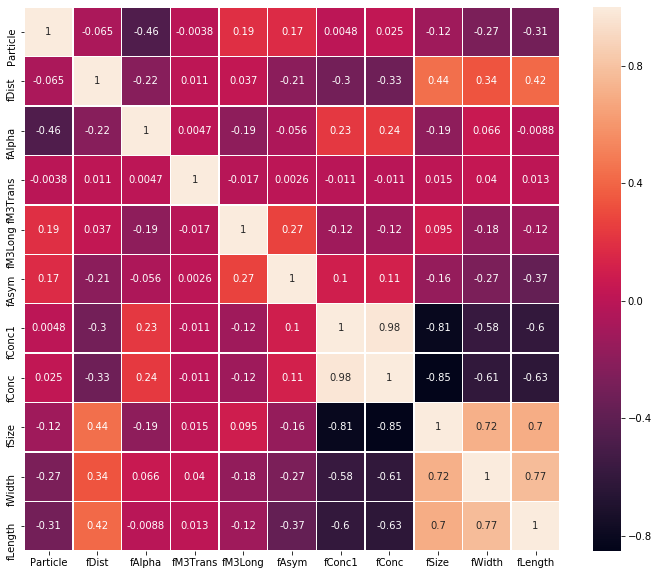

In [66]:
import pandas
import seaborn as sn
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,10))
ax = sn.heatmap(df.corr(), annot=True, linewidth=0.5)
ax.set_xlim([11,0])
ax.set_ylim([0,11])
plt.show()

_______________________________

# Binary encoding and assigning X and y

In [67]:
# X and y

y = data['Particle'].replace('h', 0).replace('g',1)
X = data[[x for x in data.columns if x not in 'Particle']]

_______________________________

# Skewed features?

In [ ]:
?

_______________________________

# Train test split

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize object
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.3)

# Create indexes 
train_index, test_index = next(sss.split(X, y))

# Assign set
X_train, X_test = X.loc[train_index], X.loc[test_index]
y_train, y_test = y.loc[train_index], y.loc[test_index]

In [71]:
display(data['Particle'].value_counts(normalize=True))
display(y_train.value_counts(normalize=True))
display(y_test.value_counts(normalize=True))

1    0.64837
0    0.35163
Name: Particle, dtype: float64

1    0.64834
0    0.35166
Name: Particle, dtype: float64

1    0.64844
0    0.35156
Name: Particle, dtype: float64

The stratified split worked

_______________________________

# START OF FIRST CLASSIFIER

# Fitting classifier: Decision Tree 

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Create instance
dt = DecisionTreeClassifier()

# Fit the classifier 
dt = dt.fit(X_train, y_train)

In [78]:
# Inspect it
dt.tree_.node_count, dt.tree_.max_depth

(2861, 35)

# Metrics

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# Predict
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Inspect metrics 
metric_inspection_train = pd.Series({'Accuracy':accuracy_score(y_train, y_train_pred),
                                     'Precision':precision_score(y_train, y_train_pred),
                                     'Recall':recall_score(y_train, y_train_pred), 
                                     'F1':f1_score(y_train, y_train_pred)},
                                      name = 'train')

metric_inspection_test = pd.Series({'Accuracy':accuracy_score(y_test, y_test_pred),
                                    'Precision':precision_score(y_test, y_test_pred),
                                    'Recall':recall_score(y_test, y_test_pred), 
                                    'F1':f1_score(y_test, y_test_pred)},
                                     name = 'test')

metric_inspection = pd.concat([metric_inspection_train, metric_inspection_test], axis = 1)


# Print
metric_inspection

,train,test
Accuracy,1.0,0.819839
Precision,1.0,0.862649
Recall,1.0,0.858919
F1,1.0,0.860780


The classifier is clearly overfitting, which node count and depth also suggested

# Grid search with cross validation

In [112]:
from sklearn.model_selection import GridSearchCV

#Define params to try
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

# Create instance
GR = GridSearchCV(DecisionTreeClassifier(),
                  param_grid=param_grid,
                  scoring = 'accuracy',
                  n_jobs = -1)

# Fit object
GR = GR.fit(X_train, y_train)

In [114]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(523, 9)

A lot less than before, but still a lot

# Metrics with Gridsearch Cross Validation

In [117]:
#Predictions
y_train_pred_GR = GR.predict(X_train)
y_test_pred_GR = GR.predict(X_test)

# Inspect metrics 
metric_inspection_train = pd.Series({'Accuracy':accuracy_score(y_train, y_train_pred_GR),
                                     'Precision':precision_score(y_train, y_train_pred_GR),
                                     'Recall':recall_score(y_train, y_train_pred_GR), 
                                     'F1':f1_score(y_train, y_train_pred_GR)},
                                      name = 'train')

metric_inspection_test = pd.Series({'Accuracy':accuracy_score(y_test, y_test_pred_GR),
                                    'Precision':precision_score(y_test, y_test_pred_GR),
                                    'Recall':recall_score(y_test, y_test_pred_GR), 
                                    'F1':f1_score(y_test, y_test_pred_GR)},
                                     name = 'test')

#Inspection 
metric_inspection = pd.concat([metric_inspection_train, metric_inspection_test], axis = 1)

# Print
metric_inspection

,train,test
Accuracy,0.899354,0.843498
Precision,0.891454,0.847831
Recall,0.961886,0.924595
F1,0.925332,0.884551


The metrics of the train set looks a lot worse, however the test set has improved significantly. This is viewed as being an improvement

# The tree

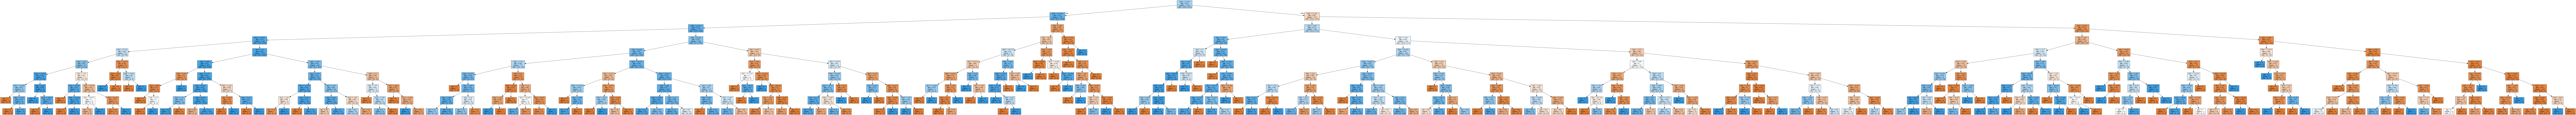

In [119]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Create an output destination for the file
dot_data = StringIO()

export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'particle_tree_prune.png'
graph.write_png(filename)
Image(filename=filename) 
### END SOLUTION

# END OF FIRST CLASSIFIER

_______________________________

# START OF SECOND CLASSIFIER

# Fitting classifier: KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier 

# Create an instance of class 
knn = KNeighborsClassifier()

# Fit 
knn = knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# TRYING WITH SCALED___________________________
from sklearn.preprocessing import StandardScaler

# Scaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

#Trying KNN again 
knn_ss = KNeighborsClassifier()
knn_ss = knn_ss.fit(X_train_ss, y_train)
y_pred_knn_ss = knn_ss.predict(X_test_ss)

# Metrics

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

print('Not scaled KNN')
print(classification_report(y_test, y_pred_knn))
print('-------------------------------------------------------------------')
print('Scaled KNN')
print(classification_report(y_test, y_pred_knn_ss))

Not scaled KNN
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      2006
           1       0.81      0.92      0.87      3700

    accuracy                           0.81      5706
   macro avg       0.81      0.77      0.78      5706
weighted avg       0.81      0.81      0.81      5706

-------------------------------------------------------------------
Scaled KNN
              precision    recall  f1-score   support

           0       0.84      0.64      0.73      2006
           1       0.83      0.94      0.88      3700

    accuracy                           0.83      5706
   macro avg       0.84      0.79      0.80      5706
weighted avg       0.83      0.83      0.82      5706



As expected from KNN, this seems to improve the metrics

In [136]:
# Setting up
max_k = 40
f1_scores = list()
error_rates = list()

# Looping to find best k
for k in range(1, max_k):
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train_ss, y_train)
    
    #METRICS 
    y_pred = knn.predict(X_test_ss)
    
    #ERROR
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
# Making dataframe  
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

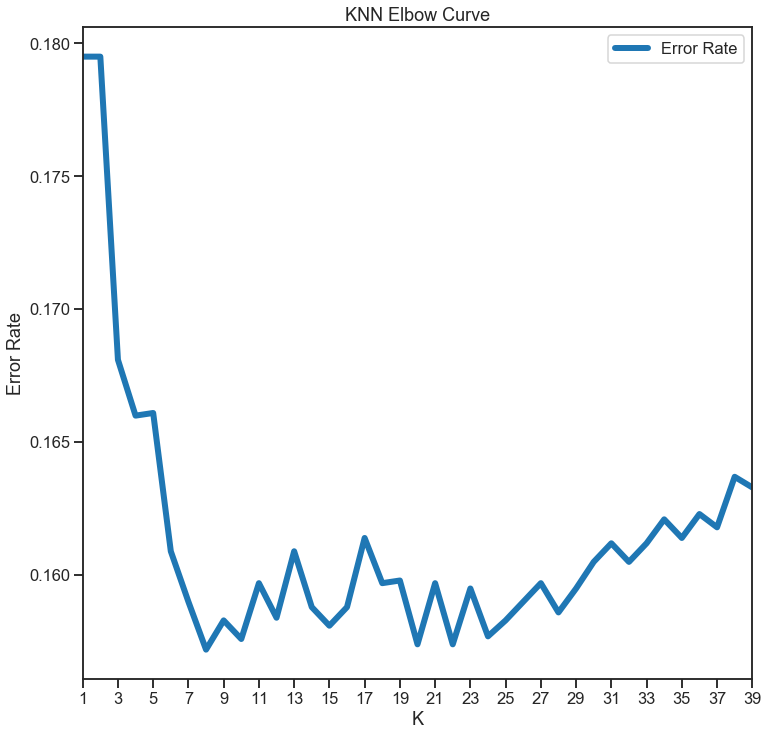

In [137]:
import seaborn as sns

# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

K = 8

# Fitting new instance

In [191]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

# Scaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

# Fitting for later use 
knn_ss_2 = KNeighborsClassifier(n_neighbors = 8)
knn_ss_2 = knn_ss_2.fit(X_train_ss, y_train)

# END OF SECOND CLASSIFIER

_______________________________

# START OF THIRD CLASSIFIER

# Fitting ensemble: RandomForest

In [153]:
from sklearn.ensemble import RandomForestClassifier

# Initialize classifier
RF = RandomForestClassifier(oob_score = True, warm_start = True, n_jobs = -1)

# Setup
oob = list()

# Looping 
for n_trees in range(20, 200, 20):
    
    # Trying different number of trees
    RF.set_params(n_estimators = n_trees)
    
    # Fitting
    RF.fit(X_train, y_train)
    
    # OOB
    oob_error = 1- RF.oob_score_ 
    
    # Append
    oob.append(pd.Series({'# of trees': n_trees, 'OOB error': oob_error}))

C:\Users\brosb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\brosb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [157]:
oob_frame = pd.concat(oob, axis=1).T.set_index('# of trees')
oob_frame

,OOB error
# of trees,
20.0,0.143308
40.0,0.128737
60.0,0.126408
80.0,0.123028
100.0,0.121526
120.0,0.121151
140.0,0.121676
160.0,0.121301
180.0,0.120249


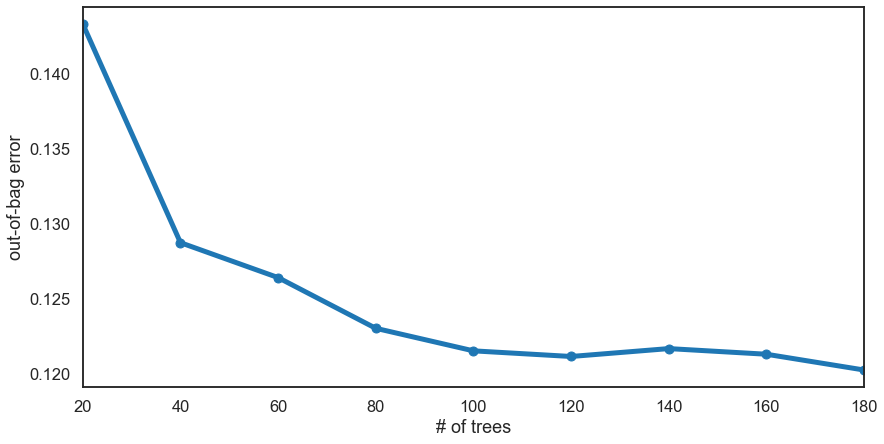

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('white')

ax = oob_frame.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

# Metrics

In [192]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

RF_classifier = RandomForestClassifier(n_estimators = 120, warm_start = True, n_jobs = -1)
RF_classifier = RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

print('Classification report')
print(classification_report(y_test, y_pred_RF))


Classification report
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2006
           1       0.88      0.94      0.91      3700

    accuracy                           0.88      5706
   macro avg       0.88      0.85      0.86      5706
weighted avg       0.88      0.88      0.88      5706



# Feature relative importance

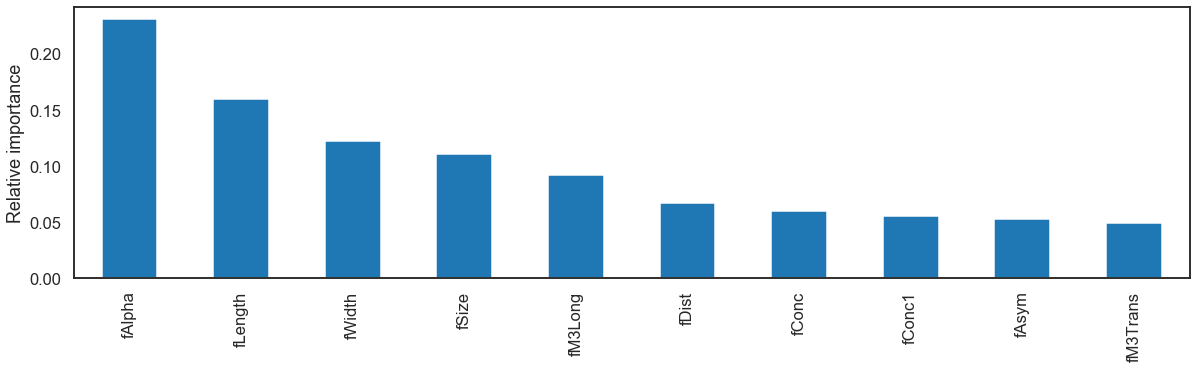

In [178]:
feature_plot = pd.Series(RF.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_plot.plot(kind='bar', figsize = (20,5))
ax.set(ylabel='Relative importance');

# END OF THIRD CLASSIFIER

_______________________________

# FINAL METRICS

In [162]:
print('Gridsearch CV Decision Trees')
print(classification_report(y_test, y_test_pred_GR))
print('--------------------------------------------------------')
print('Scaled KNN')
print(classification_report(y_test, y_pred_knn_ss))
print('--------------------------------------------------------')
print('Random Forest')
print(classification_report(y_test, y_pred_RF))

Gridsearch CV Decision Trees
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      2006
           1       0.85      0.92      0.88      3700

    accuracy                           0.84      5706
   macro avg       0.84      0.81      0.82      5706
weighted avg       0.84      0.84      0.84      5706

--------------------------------------------------------
Scaled KNN
              precision    recall  f1-score   support

           0       0.84      0.64      0.73      2006
           1       0.83      0.94      0.88      3700

    accuracy                           0.83      5706
   macro avg       0.84      0.79      0.80      5706
weighted avg       0.83      0.83      0.82      5706

--------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2006
           1       0.88      0.94      0.91      3700

    accuracy  